### Importing relevant packages

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale = 1.2)

### Loading preprocessing module

In [16]:
from preprocessing import *


### Loading validation data

In [17]:
npz = np.load('validation_data.npz')
validation_inputs, validation_targets = npz['inputs'].astype('float'), npz['targets'].astype('int')

### Making predictions

In [18]:
predictions= np.argmax(model.predict(validation_inputs),axis=1)

In [19]:
y_true= le.inverse_transform(validation_targets)
y_pred= le.inverse_transform(predictions)

In [20]:
y_true

array(['SA', 'KW', 'OM', ..., 'EG', 'JO', 'LY'], dtype=object)

In [21]:
y_pred

array(['SA', 'KW', 'LY', ..., 'LY', 'QA', 'LY'], dtype=object)

In [22]:
report=classification_report(y_true,y_pred,output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
AE,0.347903,0.286233,0.314069,2753.000000
BH,0.307615,0.231961,0.264484,2647.000000
DZ,0.485431,0.466627,0.475843,1678.000000
EG,0.696597,0.816552,0.751820,5691.000000
IQ,0.530387,0.445033,0.483976,1510.000000
JO,0.381573,0.276767,0.320827,2858.000000
KW,0.435611,0.544383,0.483961,4157.000000
LB,0.595086,0.652098,0.622289,2860.000000
LY,0.573561,0.660753,0.614077,3664.000000
MA,0.653477,0.490991,0.560700,1110.000000


### Plotting confusion matrix

In [23]:
labels=le.classes_
cm = pd.DataFrame(confusion_matrix(y_true, y_pred),columns=labels ,index=labels)

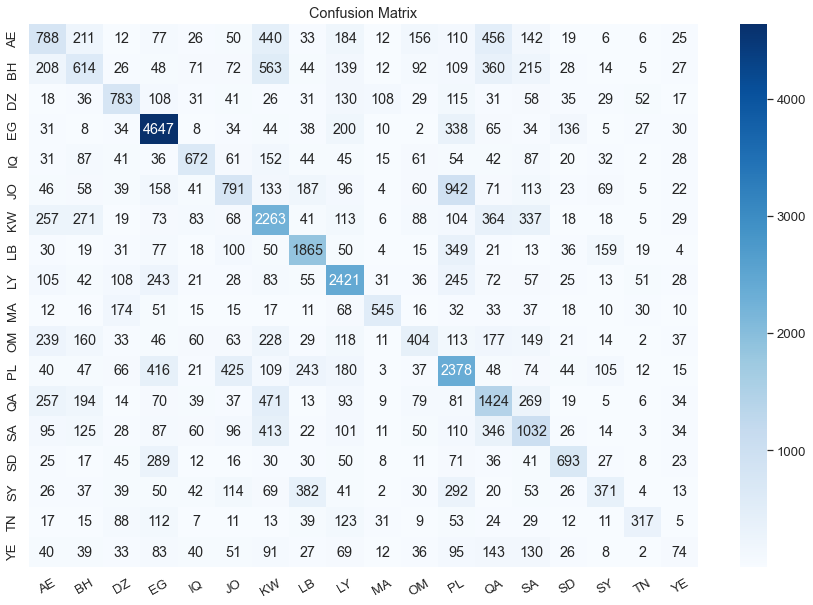

In [24]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm,ax=ax, annot=True,cmap='Blues',fmt='g')
plt.xticks(rotation=30)
plt.grid()
plt.title('Confusion Matrix')
plt.show() 